In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

## Deep Learning

In [3]:
# Carregando base de dados e dividindo entre treino e teste
(X_training, y_training), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


Text(0.5, 1.0, '4')

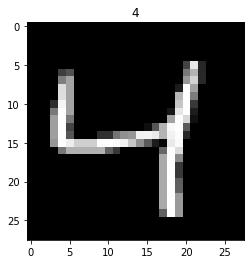

In [8]:
# Vizualizando imagens
plt.imshow(X_training[2], cmap = 'gray')
plt.title(y_training[2])

Text(0.5, 1.0, '4')

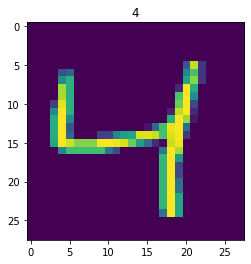

In [9]:
plt.imshow(X_training[2])
plt.title(y_training[2])

In [10]:
# Realizando rashape
X_training = X_training.reshape((len(X_training), np.prod(X_training.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Convertendo para float
X_training = X_training.astype('float32')
X_test = X_test.astype('float32')

# Normalizando dados, colocando os valores entre 0 e 1
X_training /= 255
X_test /= 255

# Fazendo One-Hot Encoding (Dummy variable)
y_training = np_utils.to_categorical(y_training, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [11]:
# Criando modelo de treinamento e teste
modelo = Sequential()

# Adicionando ao modelo camada oculta com 64 neurônios e 4 neurônios na camada de entrada
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))

# Adicionando ao modelo camada de drop-out
modelo.add(Dropout(0.2))

# Adicionando ao modelo camada oculta com 4 neurônios
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))

# Adicionando ao modelo camada oculta com 4 neurônios
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))

# Adicionando ao modelo camada de saída com 3 neurônios
modelo.add(Dense(units = 10, activation = 'softmax'))

In [12]:
# Resumo do modelo criado
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [13]:
# Compilando Rede Neural - ajuste dos pessos, cálculo de erros e resultado
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Treinando modelo
historico = modelo.fit(X_training, y_training, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4480 - accuracy: 0.8633 - val_loss: 0.1682 - val_accuracy: 0.9501
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2383 - accuracy: 0.9307 - val_loss: 0.1393 - val_accuracy: 0.9584
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1964 - accuracy: 0.9436 - val_loss: 0.1228 - val_accuracy: 0.9616
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1691 - accuracy: 0.9497 - val_loss: 0.1044 - val_accuracy: 0.9684
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1540 - accuracy: 0.9539 - val_loss: 0.0971 - val_accuracy: 0.9718
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1411 - accuracy: 0.9584 - val_loss: 0.0975 - val_accuracy: 0.9723
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1331 - accuracy: 0.9612 - val_loss: 0.0983 - val_accuracy:

In [15]:
# Verificando resultados
historico.history.keys()
plt.plot(historico.history['val_loss'])
plt.plot(historico.history['val_acc'])

KeyError: 'val_acc'

In [ ]:
# Testando modelo
previsoes = modelo.predict(X_test)

y_training[20]
novo = X_training[20]
novo = np.expand_dims(novo, axis = 0)
nova_previsao = modelo.predict(novo)

In [ ]:
# Gerando matriz de confusão
y_test_matrix = [np.argmax(t) for t in y_test]
y_previsao_matrix = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_previsao_matrix, y_previsao_matrix)